# <center> <strong> Regressão Linear <strong>

### <center> - *Regressão Linear Múltipla e Stochastic Gradient Descent (SGD)* - <center>

Guerreiros da missão: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Devagar se vai longe.

### 🌇 **Desenvolvimento - Regressão Linear**

<div style="text-align: justify;">
Os notebooks de desenvolvimento visam descrever e implementar os diferente modelos de aprendizado de máquina a serem testados no banco de dados definido a priori. Neste projeto, serão implementados os seguintes modelos: Regressão Linear Padrão, Descida do Gradiente Estocástico (SGD), Árvore de Decisão, Floresta Aleatória e k-NN Vizinhos. Vale ressaltar que a otimização deles foi realizada anteriormente no notebook denominado "Otimização de hiperparâmetros e Redução de dimensionalidade" [1] e encontra-se disponível para ser acessado no Github do trabalho. [2]
</div>

### 🖼️ **Introdução**

<div style="text-align: justify;">
A regressão linear é um modelo preditivo que modela a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (atributos), por meio da construção de uma <em>função linear</em> [Fórmula 1]. O objetivo desse modelo é minimizar a soma dos erros entre as previsões e os valores reais, utilizando um método conhecido como <em>método dos mínimos quadrados</em> [Fórmula 2].
</div>

O modelo utilizado neste notebook será o ``LinearRegression()`` (um modelo linear múltiplo — ou seja, que utiliza mais de uma variável independente) da biblioteca ``scikit-learn``.

$$
y = \beta_0 + \beta_1 x
$$
<center> [Fórmula 1: Fórmula da Regressão Linear Simples] </center>

Em relação à definição da regressão linear, temos que:
* $x$ é a variável independente, que representa o(s) atributo(s) do modelo linear.
* $\beta_0$ representa o intercepto, ou seja, o valor inicial da função linear (o valor de $y$ quando $x = 0$).
* $\beta_1$ é o coeficiente angular da função linear, representando a inclinação da reta (indicando quanto $y$ varia para cada unidade de $x$).
* $y$ é a variável dependente, que será o alvo da predição com o modelo.

Além disso, o modelo de regressão linear utiliza o <em>método dos mínimos quadrados</em> para ajustar os coeficientes. O objetivo desse método é minimizar a soma dos quadrados das diferenças entre os valores observados e os valores previstos, como descrito na equação a seguir:

$$
L(\beta_{0}, \beta_{1}) = \sum_{i=1}^{n} \left( y_{i} - \left( \beta_{0} + \beta_{1} x_{i} \right) \right)^2
$$
<center> [Fórmula 2: Método dos Mínimos Quadrados] </center>

No contexto do método dos mínimos quadrados:
* $L(\beta_0, \beta_1)$ é a *função de perda*, que quantifica o erro entre os valores observados e previstos.
* $\beta_0$ e $\beta_1$ são os coeficientes que minimizam a função de perda. Eles podem ser encontrados derivando essa função em relação a cada coeficiente.
* $n$ representa o número total de observações.

Com base nessas definições, o objetivo é ajustar os parâmetros $\beta_0$ e $\beta_1$ para que o modelo seja capaz de prever os valores da variável dependente $y$ de maneira precisa, minimizando o erro total (função de perda).

### 📚 **Importação de Bibliotecas**

Importando as bibliotecas necessárias para a execução do código.

In [11]:
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


### ⚛️ **Importação do dataset**

Como os dados já foram separados e estão em um arquivo CSV, basta importá-los para o notebook.

In [4]:
df_treino_features = pd.read_csv('data/df_treino_features.csv')
df_treino_target = pd.read_csv('data/df_treino_target.csv')
df_teste_features = pd.read_csv('data/df_teste_features.csv')
df_teste_target = pd.read_csv('data/df_teste_target.csv')
df_RMSE = pd.read_csv('data/df_RMSE.csv')

### 🎯 **Atributo ou Target?**

Com o split realizado, antes de treinar o modelo apenas é preciso definir as **features** e o **target** que serão utilizados. Vale ressaltar que é necessário que todos esses estejam em uma única dimensão.

In [5]:
y_train = df_treino_target.values.ravel()
y_test = df_teste_target.values.ravel()

X_train = df_treino_features
X_test = df_teste_features

### 🍇 **Regressão Linear Múltipla**

Agora que os dados estão prontos, é possível iniciar a construção do primeiro modelo: a regressão linear múltipla. Este algoritmo ajusta uma linha (ou plano) que melhor se aproxima dos pontos de dados, minimizando o erro quadrático médio. A regressão linear múltipla é uma abordagem simples, mas eficaz, para prever uma variável dependente com base em várias variáveis independentes.

Para implementar esse modelo e o próximo no notebook, será utilizado um pipeline com o módulo ``pipeline`` da biblioteca ``scikit-learn``. Esse pipeline organiza o fluxo de etapas de forma estruturada, incluindo normalização, e ajuste de modelos. 

In [6]:
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_linear.fit(X_train, y_train)

y_pred_linear = pipeline_linear.predict(X_test)

scores_linear_mult= cross_val_score(pipeline_linear, X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
RMSE_linear_mult = np.mean(scores_linear_mult)
print(f"O RMSE do modelo linear múltiplo foi de {-RMSE_linear_mult} K.")

O RMSE do modelo linear múltiplo foi de 17.683130438527577 K.


### 🧙🏼‍♂️ **SGD - Stochastic Gradient Descent**

Além da regressão linear clássica, será experimentada uma abordagem diferente utilizando o Stochastic Gradient Descent (SGD). Este algoritmo, já testado em uma missão anterior [1], é eficiente para grandes conjuntos de dados, pois atualiza os pesos do modelo a cada iteração, em vez de usar o conjunto completo. Dessa forma, é capaz de se ajustar mais rapidamente e com menor custo computacional em determinados cenários.

In [7]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])

pipeline_sgd.fit(X_train, y_train)

y_pred_sgd = pipeline_sgd.predict(X_test)

scores_linear_sgd= cross_val_score(pipeline_sgd, X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")
RMSE_linear_sgd = np.mean(scores_linear_sgd)
print(f"O RMSE do modelo linear SGD foi de {-RMSE_linear_sgd} K.")

O RMSE do modelo linear SGD foi de 17.906091992879386 K.


### 🛡️ **Conclusão**

Por fim, nesta seção, fazemos uma comparação direta entre os dois modelos testados: regressão linear múltipla e SGD. Avaliamos o desempenho de ambos em termos de erro (RMSE). Com base nesse resultado, podemos concluir qual modelo é mais adequado para o nosso problema e sugerir melhorias para futuras implementações, como o uso de técnicas de regularização ou a otimização de hiperparâmetros.

In [8]:
print(f"Comparação dos Modelos:")
print(f"Regressão Linear Múltipla - RMSE: {-RMSE_linear_mult}")
print(f"SGD - RMSE: {-RMSE_linear_sgd}")

Comparação dos Modelos:
Regressão Linear Múltipla - RMSE: 17.683130438527577
SGD - RMSE: 17.906091992879386


Em seguida, os valores obtidos acima serão armazenados no dataframe que contém as estimativas das métricas de todos os modelos que já foram testados (df_RMSE).

In [51]:
df_resultados_RMSE= pd.read_csv("data/df_resultados_RMSE.csv", sep=',')
df_resultados_RMSE["Regressão Linear Múltipla"] = -RMSE_linear_mult
df_resultados_RMSE["SGD"] = -RMSE_linear_sgd
df_resultados_RMSE.to_csv("data/df_resultados_RMSE.csv", index=False)


In [52]:
display(df_resultados_RMSE)

,Unnamed: 0,Baseline,Árvore de decisão,Floresta Aleatória,k-NN,Regressão Linear Múltipla,SGD
0,0,33.887487,14.63461,11.601069,12.46832,17.68313,17.906092


Abaixo, há algumas representaçõs gráficas para uma análise mais visual dos resultados obtidos.

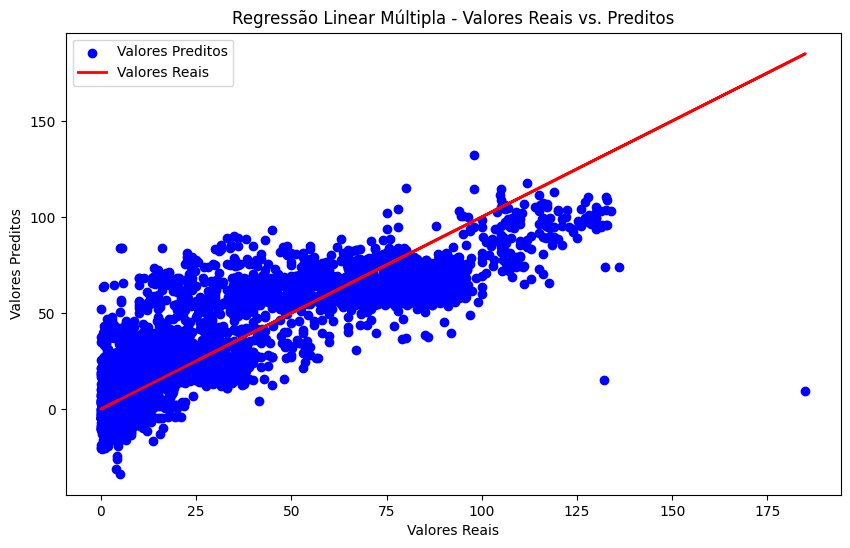

In [ ]:
import matplotlib.pyplot as plt

# Comparação dos valores reais e preditos para Regressão Linear Múltipla
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_linear, color='blue', label='Valores Preditos')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('Regressão Linear Múltipla - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


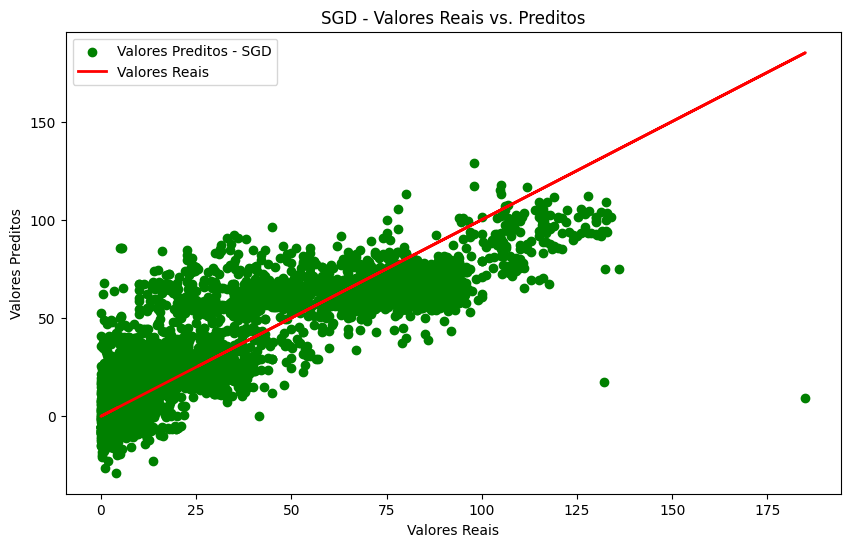

In [ ]:
# Comparação dos valores reais e preditos para o SGD
plt.figure(figsize=(10, 6))
plt.scatter(df_teste_target, y_pred_sgd, color='green', label='Valores Preditos - SGD')
plt.plot(df_teste_target, df_teste_target, color='red', label='Valores Reais', linewidth=2)
plt.title('SGD - Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()


Aparentemente, não é possível notar muita diferença entre os gráficos dos dois modelos preditivos lineares, em ambos os casos, é notória a presença de outliers, que representam dados que fogem do padrão no dataset analisado. Ademais como, no que tange à análise visual, não é perceptível muita mudança de um gráfico para outro, o fato de que os valores encontrados para o RMSE de cada um são relativamente próximos é reafirmado.

``Que a sede pela exploração da magia da predição esteja sempre com vocês! ⚔️``

## 📚 **Referências!**

[1] Santos, J.G.A; Vianna, R.G.; Cansi, T.J.S. (2024). Jupyter Notebook *Otimização de hiperparâmetros e Redução de dimensionalidade*

[2] Github do projeto: https://github.com/JuliaGuedesASantos/Machine-Learning---Cavaleiros-da-Supernova

[3] Santos, J.G.A; Vianna, R.G.; Cansi, T.J.S. (2024). Jupyter Notebook *Modelos 4*

[4] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 2.1 - Modelo linear e baseline*. [Material não publicado].